In [1]:
import torch, os
import numpy as np
from OASIS_2D.oasis import Experiment
from torchvision import models
import matplotlib.pyplot as plt

# Device

In [2]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


# Model

In [3]:
# https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
model = models.resnet18(weights='DEFAULT')
num_ftrs = model.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
model.fc = torch.nn.Linear(num_ftrs, 2)

model = model.to(device)

# Experiment

In [4]:
result_dir = os.path.join('OASIS_2D', 'results', 'ResNet18')

experiment = Experiment(result_dir, device)
model.load_state_dict(torch.load(experiment.best_model_path))

<All keys matched successfully>

In [5]:
from OASIS_2D.dataset import OASIS_Dataset
from torch.utils.data import DataLoader

SEED = 2024
test_dataset = OASIS_Dataset(train=False, seed=SEED)

Total 23, disease 13, healthy 10.             Unique patients 11.


In [6]:
x, y = test_dataset[0]
x = torch.tensor(np.expand_dims(x, axis=0), device=device)

# Gradient-based

In [7]:
from captum.attr import GradientShap
ig = GradientShap(model)
attr = ig.attribute(x, target=1, baselines=torch.zeros_like(x))

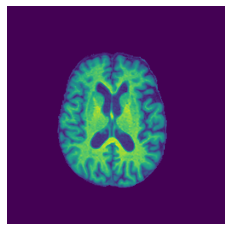

In [14]:
plt.imshow(x.squeeze()[0].cpu().detach().numpy())
_ = plt.axis('off')

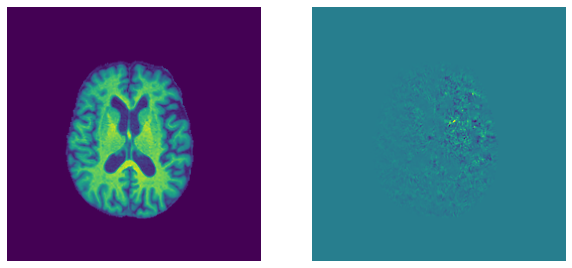

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(x.squeeze()[0].cpu().detach().numpy())
axes[1].imshow(attr.squeeze()[0].cpu().detach().numpy())
_ = axes[0].axis('off')
_ = axes[1].axis('off')

In [9]:
# from captum.attr import visualization as viz
# _ = viz.visualize_image_attr(np.transpose(attr.squeeze().cpu().detach().numpy(), (1,2,0)),
#                              np.transpose(x.squeeze().cpu().detach().numpy(), (1,2,0)),
#                              method='heat_map',
#                              show_colorbar=True,
#                              sign='positive',
#                              outlier_perc=1)

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

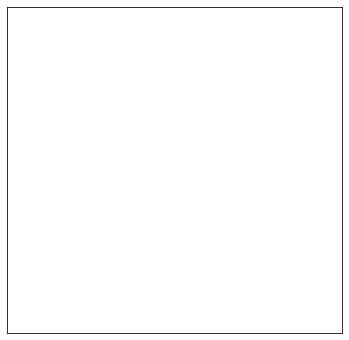

# Feature Ablation

In [9]:
from captum.attr import FeatureAblation

In [11]:
fa = FeatureAblation(model)
attr_fa = fa.attribute(
    x, show_progress=True
)

Feature Ablation attribution:   0%|          | 0/196609 [00:00<?, ?it/s]

KeyboardInterrupt: 